In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE 

from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
import eli5
from eli5.sklearn import PermutationImportance
import tensorflow as tf
import keras 
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [2]:
df = pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
list = ['Unnamed: 32','id']
df.drop(list,axis = 1, inplace = True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
#Checking for missing values
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [5]:
# Count the occurrences of malignant and non-malignant cells and print them
occ = df['diagnosis'].value_counts()
print(occ)

# Print the ratio of malignant and non-malignant cells
print(occ / len(df))

B    357
M    212
Name: diagnosis, dtype: int64
B    0.627417
M    0.372583
Name: diagnosis, dtype: float64


In [6]:
print(df.var())

radius_mean                    12.418920
texture_mean                   18.498909
perimeter_mean                590.440480
area_mean                  123843.554318
smoothness_mean                 0.000198
compactness_mean                0.002789
concavity_mean                  0.006355
concave points_mean             0.001506
symmetry_mean                   0.000752
fractal_dimension_mean          0.000050
radius_se                       0.076902
texture_se                      0.304316
perimeter_se                    4.087896
area_se                      2069.431583
smoothness_se                   0.000009
compactness_se                  0.000321
concavity_se                    0.000911
concave points_se               0.000038
symmetry_se                     0.000068
fractal_dimension_se            0.000007
radius_worst                   23.360224
texture_worst                  37.776483
perimeter_worst              1129.130847
area_worst                 324167.385102
smoothness_worst

In [7]:
#Encoding categorical data values
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['diagnosis'] = labelencoder.fit_transform(df['diagnosis'])

In [8]:
df.head(20)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678
5,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440
6,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
7,1,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510
8,1,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720
9,1,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750


In [9]:
print(df.var())

diagnosis                       0.234177
radius_mean                    12.418920
texture_mean                   18.498909
perimeter_mean                590.440480
area_mean                  123843.554318
smoothness_mean                 0.000198
compactness_mean                0.002789
concavity_mean                  0.006355
concave points_mean             0.001506
symmetry_mean                   0.000752
fractal_dimension_mean          0.000050
radius_se                       0.076902
texture_se                      0.304316
perimeter_se                    4.087896
area_se                      2069.431583
smoothness_se                   0.000009
compactness_se                  0.000321
concavity_se                    0.000911
concave points_se               0.000038
symmetry_se                     0.000068
fractal_dimension_se            0.000007
radius_worst                   23.360224
texture_worst                  37.776483
perimeter_worst              1129.130847
area_worst      

In [10]:
print(df.corr())

                         diagnosis  radius_mean  texture_mean  perimeter_mean  \
diagnosis                 1.000000     0.730029      0.415185        0.742636   
radius_mean               0.730029     1.000000      0.323782        0.997855   
texture_mean              0.415185     0.323782      1.000000        0.329533   
perimeter_mean            0.742636     0.997855      0.329533        1.000000   
area_mean                 0.708984     0.987357      0.321086        0.986507   
smoothness_mean           0.358560     0.170581     -0.023389        0.207278   
compactness_mean          0.596534     0.506124      0.236702        0.556936   
concavity_mean            0.696360     0.676764      0.302418        0.716136   
concave points_mean       0.776614     0.822529      0.293464        0.850977   
symmetry_mean             0.330499     0.147741      0.071401        0.183027   
fractal_dimension_mean   -0.012838    -0.311631     -0.076437       -0.261477   
radius_se                 0.

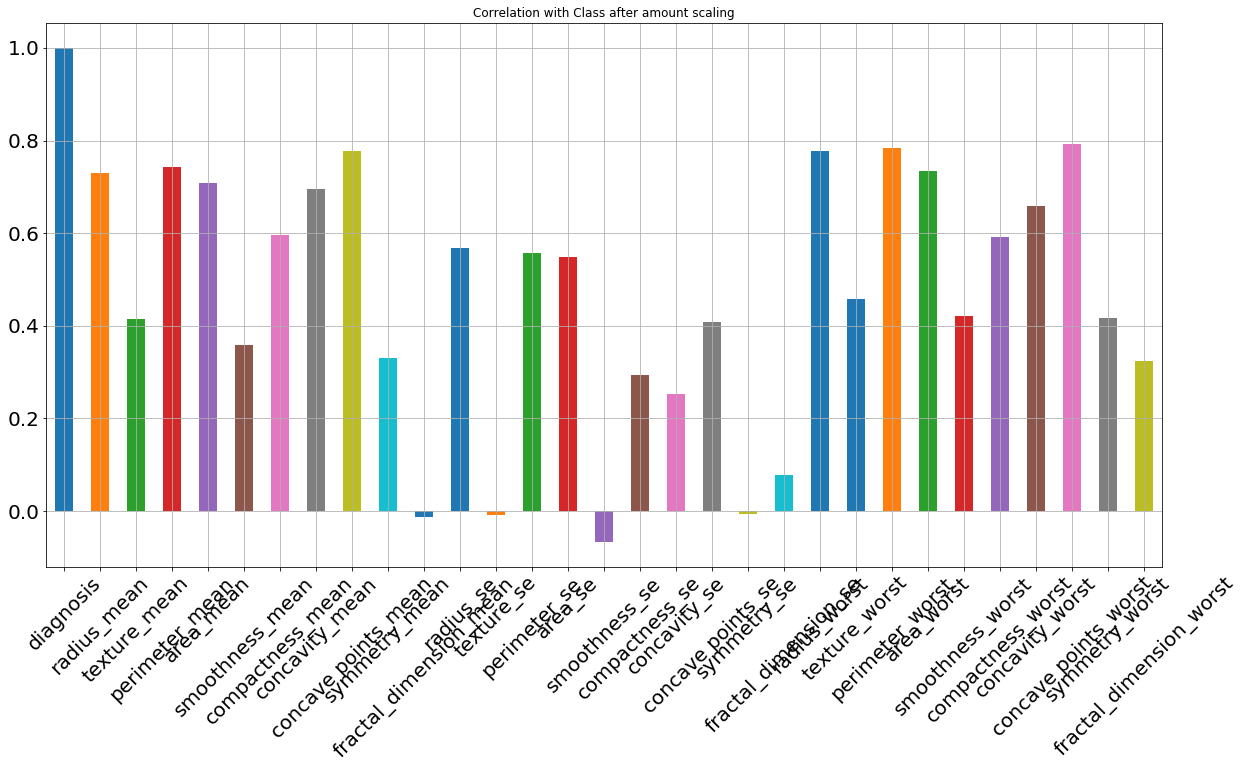

In [11]:
#Correlation checking in the dataset
df.corrwith(df.diagnosis).plot.bar(
        figsize = (20, 10), title = "Correlation with Class after amount scaling", fontsize = 20,
        rot = 45, grid = True)

In [12]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df['radius_mean'] = ss.fit_transform(df['radius_mean'].values.reshape(-1,1))
df['texture_mean'] = ss.fit_transform(df['texture_mean'].values.reshape(-1,1))
df['perimeter_mean'] = ss.fit_transform(df['perimeter_mean'].values.reshape(-1,1))
df['area_mean'] = ss.fit_transform(df['area_mean'].values.reshape(-1,1))
df['perimeter_se'] = ss.fit_transform(df['perimeter_se'].values.reshape(-1,1))
df['area_se'] = ss.fit_transform(df['area_se'].values.reshape(-1,1))
df['radius_worst'] = ss.fit_transform(df['radius_worst'].values.reshape(-1,1))
df['texture_worst'] = ss.fit_transform(df['texture_worst'].values.reshape(-1,1))
df['perimeter_worst'] = ss.fit_transform(df['perimeter_worst'].values.reshape(-1,1))
df['area_worst'] = ss.fit_transform(df['area_worst'].values.reshape(-1,1))

In [13]:
print(df.var())

diagnosis                  0.234177
radius_mean                1.001761
texture_mean               1.001761
perimeter_mean             1.001761
area_mean                  1.001761
smoothness_mean            0.000198
compactness_mean           0.002789
concavity_mean             0.006355
concave points_mean        0.001506
symmetry_mean              0.000752
fractal_dimension_mean     0.000050
radius_se                  0.076902
texture_se                 0.304316
perimeter_se               1.001761
area_se                    1.001761
smoothness_se              0.000009
compactness_se             0.000321
concavity_se               0.000911
concave points_se          0.000038
symmetry_se                0.000068
fractal_dimension_se       0.000007
radius_worst               1.001761
texture_worst              1.001761
perimeter_worst            1.001761
area_worst                 1.001761
smoothness_worst           0.000521
compactness_worst          0.024755
concavity_worst            0

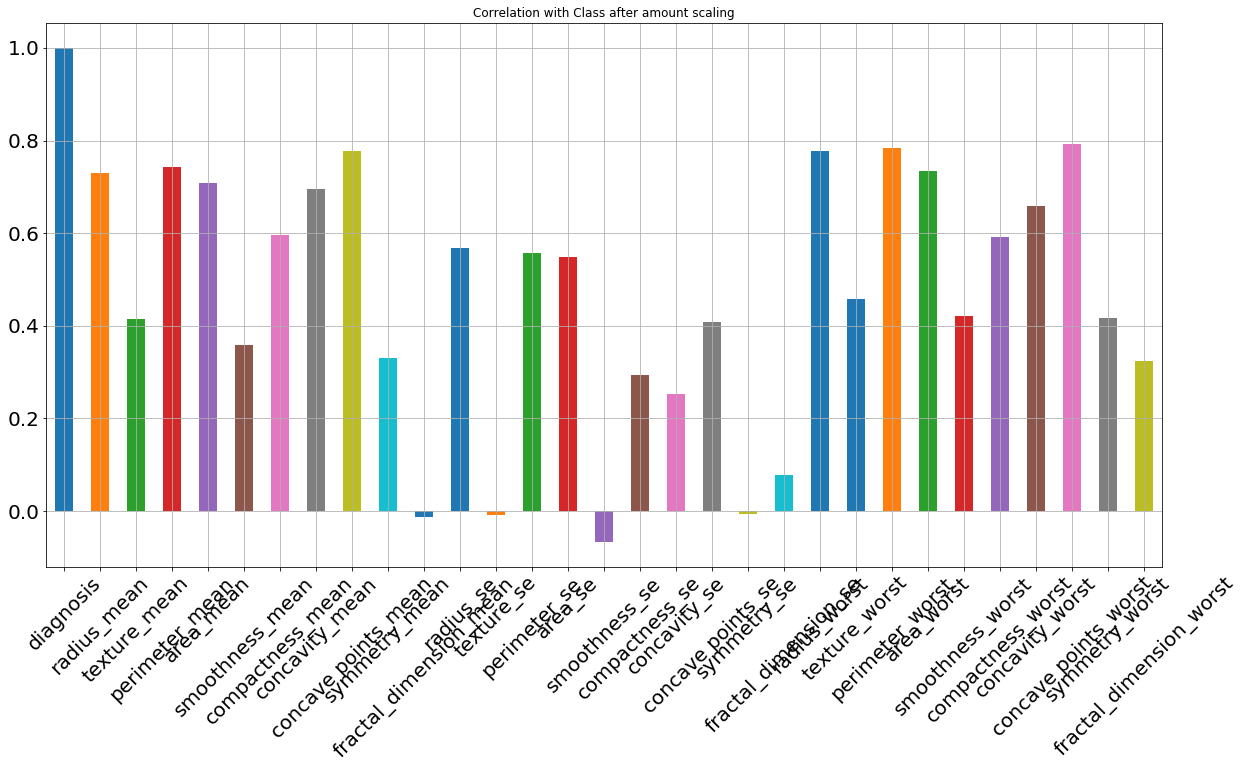

In [14]:
#Correlation checking in the dataset after scaling
df.corrwith(df.diagnosis).plot.bar(
        figsize = (20, 10), title = "Correlation with Class after amount scaling", fontsize = 20,
        rot = 45, grid = True)

In [15]:
df_1 = pd.DataFrame(df['diagnosis'])
df_1.head(20)

,diagnosis
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [16]:
df.drop(['diagnosis'], axis =1, inplace = True)
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,1.886690,-1.359293,2.303601,2.001237,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1.829821,-0.353632,1.685955,1.908708,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,1.805927,-0.369203,1.535126,1.890489,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1.579888,0.456187,1.566503,1.558884,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,1.511870,-0.023974,1.347475,1.456285,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,-0.768909,0.253732,-0.592687,-0.764464,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,-0.281464,0.133984,-0.249939,-0.550021,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1.750297,-1.151816,1.776573,1.826229,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,1.298575,-1.466770,1.338539,1.220724,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [17]:
from sklearn.decomposition import PCA
pca = PCA()
df_pca = pd.DataFrame(pca.fit_transform(df), columns=df.columns)
print(df_pca.head())

   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0     4.565628     -3.497755        1.531934  -0.451321        -1.395686   
1     3.992116     -1.448159       -1.338226   0.242126         0.054385   
2     3.938827     -0.645894       -0.439408  -0.167338         0.337810   
3    -1.030887      0.517706        0.527661  -0.498010        -0.361661   
4     3.648843     -2.767835       -0.159601   0.384032         0.426475   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0         -0.565469       -0.236110             0.033312      -0.259738   
1          0.458876       -0.218042            -0.002188       0.116410   
2          0.036495       -0.024505             0.186339      -0.075358   
3         -0.850153       -0.004676             0.382904      -0.100807   
4         -0.155938        0.110756            -0.044696       0.115123   

   fractal_dimension_mean           ...             radius_worst  \
0               -0.24723

In [18]:
print(df_pca.corr())

                          radius_mean  texture_mean  perimeter_mean  \
radius_mean              1.000000e+00 -2.095167e-17   -2.021972e-16   
texture_mean            -2.095167e-17  1.000000e+00   -2.831446e-16   
perimeter_mean          -2.021972e-16 -2.831446e-16    1.000000e+00   
area_mean               -4.575554e-17  1.226843e-16    3.087901e-16   
smoothness_mean          5.913467e-17  1.480064e-16    3.441796e-16   
compactness_mean         2.924572e-18 -1.164176e-16   -1.187577e-16   
concavity_mean          -3.794478e-17  3.050914e-17    3.225771e-16   
concave points_mean     -2.500401e-17  4.120951e-18   -2.749738e-16   
symmetry_mean            7.174316e-17 -7.296299e-17   -3.034678e-16   
fractal_dimension_mean   6.503682e-17 -1.322566e-17    1.903429e-16   
radius_se                1.186642e-17 -8.586978e-17    4.487869e-17   
texture_se               5.564833e-17  2.107778e-17    6.678156e-17   
perimeter_se             7.054771e-18 -1.013928e-17    8.716746e-17   
area_s

In [19]:
X = df_pca
Y = df_1['diagnosis']

In [20]:
print(X.shape)
print(Y.shape)

(569, 30)
(569,)


In [21]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, 
                                                    stratify = Y)

X_train_train, X_test_test, Y_train_train, Y_test_test = train_test_split(X_train, Y_train, test_size = 0.20)

sm = SMOTE(random_state=42, kind = 'borderline1')

X_resampled, Y_resampled = sm.fit_resample(X_train_train, Y_train_train)

In [22]:
print("Shape of X: {}".format(X.shape))
print("Shape of Y: {}".format(Y.shape))
print("Shape of X_train: {}".format(X_train.shape))
print("Shape of X_test: {}".format(X_test.shape))
print("Shape of Y_train: {}".format(Y_train.shape))
print("Shape of Y_test: {}".format(Y_test.shape))
print("Shape of X_resampled: {}".format(X_resampled.shape))
print("Shape of Y_resampled: {}".format(Y_resampled.shape))

Shape of X: (569, 30)
Shape of Y: (569,)
Shape of X_train: (455, 30)
Shape of X_test: (114, 30)
Shape of Y_train: (455,)
Shape of Y_test: (114,)
Shape of X_resampled: (440, 30)
Shape of Y_resampled: (440,)


In [23]:
from sklearn.metrics import f1_score
callbacks = [EarlyStopping(monitor='val_loss',mode='min',patience=2, restore_best_weights = True)]
results_control_accuracy = []
for i in range(0,30):
    model = Sequential()
    model.add(Dense(64, input_dim=len(X.columns),kernel_initializer = 'he_normal', activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, input_dim=len(X.columns),kernel_initializer = 'he_normal', activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(keras.optimizers.Adam(lr=0.001),'binary_crossentropy',metrics=['accuracy'])

    history = model.fit(X_resampled, Y_resampled, callbacks = callbacks,
          epochs=30,validation_data = (X_test_test, Y_test_test),
          batch_size=256)

    y_test_pred= model.predict(X_test) > 0.5
    
    f1 = f1_score(Y_test, y_test_pred)
    
    results_control_accuracy.append(f1)
    
print(results_control_accuracy)

Train on 440 samples, validate on 91 samples
Epoch 1/30
440/440 [==============================] - 1s 3ms/step - loss: 0.9705 - acc: 0.4636 - val_loss: 0.8589 - val_acc: 0.3407
Epoch 2/30
440/440 [==============================] - 0s 36us/step - loss: 0.9003 - acc: 0.4523 - val_loss: 0.7795 - val_acc: 0.4066
Epoch 3/30
440/440 [==============================] - 0s 32us/step - loss: 0.8398 - acc: 0.5273 - val_loss: 0.7100 - val_acc: 0.4725
Epoch 4/30
440/440 [==============================] - 0s 32us/step - loss: 0.7605 - acc: 0.5614 - val_loss: 0.6482 - val_acc: 0.5934
Epoch 5/30
440/440 [==============================] - 0s 38us/step - loss: 0.7303 - acc: 0.5545 - val_loss: 0.5952 - val_acc: 0.6813
Epoch 6/30
440/440 [==============================] - 0s 42us/step - loss: 0.6889 - acc: 0.5795 - val_loss: 0.5473 - val_acc: 0.8462
Epoch 7/30
440/440 [==============================] - 0s 31us/step - loss: 0.6187 - acc: 0.6409 - val_loss: 0.5039 - val_acc: 0.8901
Epoch 8/30
440/440 [=====

440/440 [==============================] - 1s 3ms/step - loss: 0.9103 - acc: 0.4795 - val_loss: 0.5973 - val_acc: 0.7363
Epoch 2/30
440/440 [==============================] - 0s 28us/step - loss: 0.7928 - acc: 0.5636 - val_loss: 0.5445 - val_acc: 0.7912
Epoch 3/30
440/440 [==============================] - 0s 34us/step - loss: 0.7734 - acc: 0.5318 - val_loss: 0.4983 - val_acc: 0.8462
Epoch 4/30
440/440 [==============================] - 0s 30us/step - loss: 0.7041 - acc: 0.5977 - val_loss: 0.4582 - val_acc: 0.8462
Epoch 5/30
440/440 [==============================] - 0s 32us/step - loss: 0.6421 - acc: 0.6318 - val_loss: 0.4243 - val_acc: 0.8681
Epoch 6/30
440/440 [==============================] - 0s 32us/step - loss: 0.6152 - acc: 0.6205 - val_loss: 0.3962 - val_acc: 0.8791
Epoch 7/30
440/440 [==============================] - 0s 32us/step - loss: 0.5819 - acc: 0.6705 - val_loss: 0.3726 - val_acc: 0.8791
Epoch 8/30
440/440 [==============================] - 0s 32us/step - loss: 0.5397

Epoch 2/30
440/440 [==============================] - 0s 32us/step - loss: 0.7210 - acc: 0.5864 - val_loss: 0.4838 - val_acc: 0.7582
Epoch 3/30
440/440 [==============================] - 0s 33us/step - loss: 0.6944 - acc: 0.6159 - val_loss: 0.4446 - val_acc: 0.8681
Epoch 4/30
440/440 [==============================] - 0s 33us/step - loss: 0.6331 - acc: 0.6250 - val_loss: 0.4125 - val_acc: 0.8901
Epoch 5/30
440/440 [==============================] - 0s 32us/step - loss: 0.5990 - acc: 0.6818 - val_loss: 0.3858 - val_acc: 0.8791
Epoch 6/30
440/440 [==============================] - 0s 35us/step - loss: 0.5779 - acc: 0.6773 - val_loss: 0.3638 - val_acc: 0.8901
Epoch 7/30
440/440 [==============================] - 0s 33us/step - loss: 0.5506 - acc: 0.7045 - val_loss: 0.3463 - val_acc: 0.8901
Epoch 8/30
440/440 [==============================] - 0s 32us/step - loss: 0.5114 - acc: 0.7114 - val_loss: 0.3313 - val_acc: 0.8901
Epoch 9/30
440/440 [==============================] - 0s 32us/step - 

440/440 [==============================] - 0s 36us/step - loss: 0.8838 - acc: 0.4909 - val_loss: 0.7362 - val_acc: 0.4066
Epoch 3/30
440/440 [==============================] - 0s 39us/step - loss: 0.8111 - acc: 0.5273 - val_loss: 0.6665 - val_acc: 0.4835
Epoch 4/30
440/440 [==============================] - 0s 38us/step - loss: 0.7613 - acc: 0.5750 - val_loss: 0.6047 - val_acc: 0.5385
Epoch 5/30
440/440 [==============================] - 0s 40us/step - loss: 0.7263 - acc: 0.5750 - val_loss: 0.5504 - val_acc: 0.7473
Epoch 6/30
440/440 [==============================] - 0s 37us/step - loss: 0.6601 - acc: 0.6318 - val_loss: 0.5029 - val_acc: 0.8462
Epoch 7/30
440/440 [==============================] - 0s 32us/step - loss: 0.6006 - acc: 0.6545 - val_loss: 0.4627 - val_acc: 0.8681
Epoch 8/30
440/440 [==============================] - 0s 32us/step - loss: 0.5849 - acc: 0.6545 - val_loss: 0.4280 - val_acc: 0.8901
Epoch 9/30
440/440 [==============================] - 0s 32us/step - loss: 0.515

Epoch 3/30
440/440 [==============================] - 0s 31us/step - loss: 0.8211 - acc: 0.5205 - val_loss: 0.5246 - val_acc: 0.7692
Epoch 4/30
440/440 [==============================] - 0s 32us/step - loss: 0.6892 - acc: 0.6386 - val_loss: 0.4883 - val_acc: 0.8571
Epoch 5/30
440/440 [==============================] - 0s 32us/step - loss: 0.6485 - acc: 0.6568 - val_loss: 0.4572 - val_acc: 0.8462
Epoch 6/30
440/440 [==============================] - 0s 32us/step - loss: 0.5983 - acc: 0.7136 - val_loss: 0.4309 - val_acc: 0.8571
Epoch 7/30
440/440 [==============================] - 0s 34us/step - loss: 0.5495 - acc: 0.7023 - val_loss: 0.4084 - val_acc: 0.8681
Epoch 8/30
440/440 [==============================] - 0s 34us/step - loss: 0.5272 - acc: 0.7318 - val_loss: 0.3891 - val_acc: 0.8571
Epoch 9/30
440/440 [==============================] - 0s 33us/step - loss: 0.5162 - acc: 0.7477 - val_loss: 0.3724 - val_acc: 0.8571
Epoch 10/30
440/440 [==============================] - 0s 34us/step -

440/440 [==============================] - 0s 36us/step - loss: 0.8187 - acc: 0.6250 - val_loss: 0.5934 - val_acc: 0.6374
Epoch 4/30
440/440 [==============================] - 0s 36us/step - loss: 0.8541 - acc: 0.5682 - val_loss: 0.5422 - val_acc: 0.7253
Epoch 5/30
440/440 [==============================] - 0s 34us/step - loss: 0.7773 - acc: 0.6114 - val_loss: 0.4980 - val_acc: 0.7912
Epoch 6/30
440/440 [==============================] - 0s 35us/step - loss: 0.6447 - acc: 0.6545 - val_loss: 0.4602 - val_acc: 0.8352
Epoch 7/30
440/440 [==============================] - 0s 34us/step - loss: 0.6592 - acc: 0.6386 - val_loss: 0.4282 - val_acc: 0.8352
Epoch 8/30
440/440 [==============================] - 0s 36us/step - loss: 0.6537 - acc: 0.6523 - val_loss: 0.4022 - val_acc: 0.8352
Epoch 9/30
440/440 [==============================] - 0s 33us/step - loss: 0.5761 - acc: 0.7432 - val_loss: 0.3806 - val_acc: 0.8352
Epoch 10/30
440/440 [==============================] - 0s 34us/step - loss: 0.55

Epoch 4/30
440/440 [==============================] - 0s 39us/step - loss: 0.6712 - acc: 0.6273 - val_loss: 0.3949 - val_acc: 0.9231
Epoch 5/30
440/440 [==============================] - 0s 36us/step - loss: 0.6169 - acc: 0.6568 - val_loss: 0.3745 - val_acc: 0.9121
Epoch 6/30
440/440 [==============================] - 0s 39us/step - loss: 0.5537 - acc: 0.6932 - val_loss: 0.3565 - val_acc: 0.9231
Epoch 7/30
440/440 [==============================] - 0s 38us/step - loss: 0.5195 - acc: 0.7182 - val_loss: 0.3414 - val_acc: 0.9231
Epoch 8/30
440/440 [==============================] - 0s 43us/step - loss: 0.5223 - acc: 0.7136 - val_loss: 0.3285 - val_acc: 0.9341
Epoch 9/30
440/440 [==============================] - 0s 42us/step - loss: 0.5262 - acc: 0.7114 - val_loss: 0.3182 - val_acc: 0.9341
Epoch 10/30
440/440 [==============================] - 0s 40us/step - loss: 0.5167 - acc: 0.7182 - val_loss: 0.3100 - val_acc: 0.9341
Epoch 11/30
440/440 [==============================] - 0s 40us/step 

440/440 [==============================] - 0s 45us/step - loss: 0.6285 - acc: 0.6568 - val_loss: 0.4458 - val_acc: 0.9011
Epoch 5/30
440/440 [==============================] - 0s 44us/step - loss: 0.6057 - acc: 0.6659 - val_loss: 0.4188 - val_acc: 0.8901
Epoch 6/30
440/440 [==============================] - 0s 48us/step - loss: 0.5673 - acc: 0.6682 - val_loss: 0.3950 - val_acc: 0.8901
Epoch 7/30
440/440 [==============================] - 0s 44us/step - loss: 0.5353 - acc: 0.6977 - val_loss: 0.3753 - val_acc: 0.9011
Epoch 8/30
440/440 [==============================] - 0s 40us/step - loss: 0.5177 - acc: 0.7068 - val_loss: 0.3585 - val_acc: 0.9121
Epoch 9/30
440/440 [==============================] - 0s 39us/step - loss: 0.5173 - acc: 0.7205 - val_loss: 0.3453 - val_acc: 0.9231
Epoch 10/30
440/440 [==============================] - 0s 43us/step - loss: 0.4819 - acc: 0.7500 - val_loss: 0.3332 - val_acc: 0.9231
Epoch 11/30
440/440 [==============================] - 0s 41us/step - loss: 0.4

Epoch 5/30
440/440 [==============================] - 0s 51us/step - loss: 0.6673 - acc: 0.6023 - val_loss: 0.5402 - val_acc: 0.8352
Epoch 6/30
440/440 [==============================] - 0s 48us/step - loss: 0.6631 - acc: 0.6045 - val_loss: 0.4926 - val_acc: 0.9011
Epoch 7/30
440/440 [==============================] - 0s 50us/step - loss: 0.5843 - acc: 0.6591 - val_loss: 0.4517 - val_acc: 0.9121
Epoch 8/30
440/440 [==============================] - 0s 47us/step - loss: 0.5730 - acc: 0.6727 - val_loss: 0.4167 - val_acc: 0.9341
Epoch 9/30
440/440 [==============================] - 0s 51us/step - loss: 0.5484 - acc: 0.6886 - val_loss: 0.3872 - val_acc: 0.9341
Epoch 10/30
440/440 [==============================] - 0s 49us/step - loss: 0.4990 - acc: 0.7318 - val_loss: 0.3614 - val_acc: 0.9451
Epoch 11/30
440/440 [==============================] - 0s 47us/step - loss: 0.4865 - acc: 0.7750 - val_loss: 0.3389 - val_acc: 0.9451
Epoch 12/30
440/440 [==============================] - 0s 53us/step

440/440 [==============================] - 0s 42us/step - loss: 0.7395 - acc: 0.5455 - val_loss: 0.6554 - val_acc: 0.5604
Epoch 6/30
440/440 [==============================] - 0s 45us/step - loss: 0.7038 - acc: 0.5955 - val_loss: 0.6130 - val_acc: 0.7253
Epoch 7/30
440/440 [==============================] - 0s 39us/step - loss: 0.6562 - acc: 0.6136 - val_loss: 0.5741 - val_acc: 0.8352
Epoch 8/30
440/440 [==============================] - 0s 39us/step - loss: 0.6007 - acc: 0.6886 - val_loss: 0.5383 - val_acc: 0.8901
Epoch 9/30
440/440 [==============================] - 0s 41us/step - loss: 0.5904 - acc: 0.6591 - val_loss: 0.5052 - val_acc: 0.9231
Epoch 10/30
440/440 [==============================] - 0s 37us/step - loss: 0.5545 - acc: 0.7364 - val_loss: 0.4752 - val_acc: 0.9341
Epoch 11/30
440/440 [==============================] - 0s 40us/step - loss: 0.5170 - acc: 0.7409 - val_loss: 0.4478 - val_acc: 0.9341
Epoch 12/30
440/440 [==============================] - 0s 36us/step - loss: 0.

Epoch 6/30
440/440 [==============================] - 0s 45us/step - loss: 0.5838 - acc: 0.7068 - val_loss: 0.4238 - val_acc: 0.9341
Epoch 7/30
440/440 [==============================] - 0s 35us/step - loss: 0.5933 - acc: 0.6477 - val_loss: 0.3898 - val_acc: 0.9341
Epoch 8/30
440/440 [==============================] - 0s 37us/step - loss: 0.5278 - acc: 0.7045 - val_loss: 0.3608 - val_acc: 0.9451
Epoch 9/30
440/440 [==============================] - 0s 39us/step - loss: 0.5329 - acc: 0.7045 - val_loss: 0.3364 - val_acc: 0.9451
Epoch 10/30
440/440 [==============================] - 0s 39us/step - loss: 0.5011 - acc: 0.7273 - val_loss: 0.3160 - val_acc: 0.9451
Epoch 11/30
440/440 [==============================] - 0s 40us/step - loss: 0.4557 - acc: 0.7568 - val_loss: 0.2995 - val_acc: 0.9451
Epoch 12/30
440/440 [==============================] - 0s 39us/step - loss: 0.4674 - acc: 0.7750 - val_loss: 0.2859 - val_acc: 0.9451
Epoch 13/30
440/440 [==============================] - 0s 37us/ste

440/440 [==============================] - 0s 40us/step - loss: 0.7286 - acc: 0.5591 - val_loss: 0.5067 - val_acc: 0.8791
Epoch 7/30
440/440 [==============================] - 0s 39us/step - loss: 0.6671 - acc: 0.6000 - val_loss: 0.4728 - val_acc: 0.8901
Epoch 8/30
440/440 [==============================] - 0s 40us/step - loss: 0.6593 - acc: 0.6136 - val_loss: 0.4437 - val_acc: 0.9121
Epoch 9/30
440/440 [==============================] - 0s 39us/step - loss: 0.5915 - acc: 0.6523 - val_loss: 0.4187 - val_acc: 0.9121
Epoch 10/30
440/440 [==============================] - 0s 35us/step - loss: 0.5847 - acc: 0.6773 - val_loss: 0.3968 - val_acc: 0.9121
Epoch 11/30
440/440 [==============================] - 0s 36us/step - loss: 0.5168 - acc: 0.7182 - val_loss: 0.3777 - val_acc: 0.9121
Epoch 12/30
440/440 [==============================] - 0s 36us/step - loss: 0.5127 - acc: 0.7205 - val_loss: 0.3610 - val_acc: 0.9011
Epoch 13/30
440/440 [==============================] - 0s 41us/step - loss: 0

Epoch 7/30
440/440 [==============================] - 0s 38us/step - loss: 0.5900 - acc: 0.6727 - val_loss: 0.3545 - val_acc: 0.9011
Epoch 8/30
440/440 [==============================] - 0s 37us/step - loss: 0.5391 - acc: 0.7205 - val_loss: 0.3427 - val_acc: 0.9011
Epoch 9/30
440/440 [==============================] - 0s 37us/step - loss: 0.4981 - acc: 0.7159 - val_loss: 0.3328 - val_acc: 0.8901
Epoch 10/30
440/440 [==============================] - 0s 38us/step - loss: 0.4836 - acc: 0.7636 - val_loss: 0.3240 - val_acc: 0.8901
Epoch 11/30
440/440 [==============================] - 0s 39us/step - loss: 0.4658 - acc: 0.7568 - val_loss: 0.3157 - val_acc: 0.9121
Epoch 12/30
440/440 [==============================] - 0s 39us/step - loss: 0.4630 - acc: 0.7705 - val_loss: 0.3077 - val_acc: 0.9121
Epoch 13/30
440/440 [==============================] - 0s 40us/step - loss: 0.4516 - acc: 0.7614 - val_loss: 0.3008 - val_acc: 0.9121
Epoch 14/30
440/440 [==============================] - 0s 40us/st

440/440 [==============================] - 0s 40us/step - loss: 0.6567 - acc: 0.6159 - val_loss: 0.4666 - val_acc: 0.8462
Epoch 8/30
440/440 [==============================] - 0s 40us/step - loss: 0.5861 - acc: 0.6705 - val_loss: 0.4414 - val_acc: 0.8462
Epoch 9/30
440/440 [==============================] - 0s 36us/step - loss: 0.5849 - acc: 0.6864 - val_loss: 0.4198 - val_acc: 0.8462
Epoch 10/30
440/440 [==============================] - 0s 40us/step - loss: 0.5333 - acc: 0.7432 - val_loss: 0.4015 - val_acc: 0.8462
Epoch 11/30
440/440 [==============================] - 0s 39us/step - loss: 0.5202 - acc: 0.7455 - val_loss: 0.3864 - val_acc: 0.8571
Epoch 12/30
440/440 [==============================] - 0s 41us/step - loss: 0.4825 - acc: 0.7977 - val_loss: 0.3729 - val_acc: 0.8571
Epoch 13/30
440/440 [==============================] - 0s 43us/step - loss: 0.4949 - acc: 0.7659 - val_loss: 0.3605 - val_acc: 0.8571
Epoch 14/30
440/440 [==============================] - 0s 41us/step - loss: 

Epoch 8/30
440/440 [==============================] - 0s 39us/step - loss: 0.5699 - acc: 0.6864 - val_loss: 0.4269 - val_acc: 0.8681
Epoch 9/30
440/440 [==============================] - 0s 40us/step - loss: 0.5465 - acc: 0.7136 - val_loss: 0.4088 - val_acc: 0.8681
Epoch 10/30
440/440 [==============================] - 0s 38us/step - loss: 0.5385 - acc: 0.7250 - val_loss: 0.3923 - val_acc: 0.8681
Epoch 11/30
440/440 [==============================] - 0s 36us/step - loss: 0.4761 - acc: 0.7477 - val_loss: 0.3768 - val_acc: 0.8681
Epoch 12/30
440/440 [==============================] - 0s 43us/step - loss: 0.4775 - acc: 0.7773 - val_loss: 0.3632 - val_acc: 0.8791
Epoch 13/30
440/440 [==============================] - 0s 38us/step - loss: 0.4792 - acc: 0.7523 - val_loss: 0.3513 - val_acc: 0.8901
Epoch 14/30
440/440 [==============================] - 0s 43us/step - loss: 0.4314 - acc: 0.7864 - val_loss: 0.3406 - val_acc: 0.8901
Epoch 15/30
440/440 [==============================] - 0s 41us/s

In [24]:
results_control_accuracy = pd.DataFrame(results_control_accuracy)
mean_control_accuracy = results_control_accuracy.mean()
print("Mean Control Accuracy: {}".format(mean_control_accuracy))

Mean Control Accuracy: 0    0.9301
dtype: float64


In [25]:
std_control_accuracy = results_control_accuracy.std()
print("Standard Deviation of Control Accuracy Results: {}".format(std_control_accuracy))

Standard Deviation of Control Accuracy Results: 0    0.014589
dtype: float64


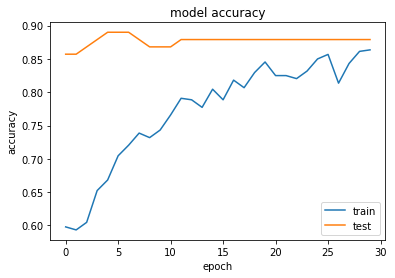

In [26]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

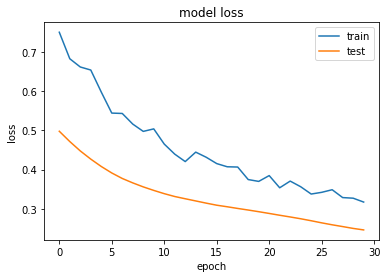

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [28]:
#Confusion Matrix 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_test_pred)
print(cm)

[[66  6]
 [ 0 42]]


In [29]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        72
           1       0.88      1.00      0.93        42

   micro avg       0.95      0.95      0.95       114
   macro avg       0.94      0.96      0.94       114
weighted avg       0.95      0.95      0.95       114



In [30]:
print('Train Accuracy: {}\nTest Accuracy:{}'.format(history.history['acc'][-1], history.history['val_acc'][-1]))

Train Accuracy: 0.8636363636363636
Test Accuracy:0.8791208863258362


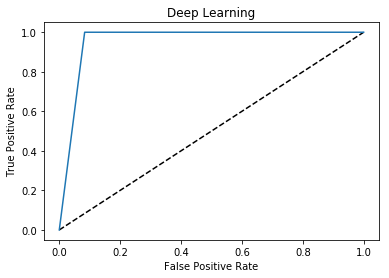

In [31]:
#Roc curve generation
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_test, y_test_pred)
plt.plot ([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label = 'Deep Learning')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Deep Learning')
plt.show()

In [32]:
from sklearn.metrics import f1_score
callbacks = [EarlyStopping(monitor='val_loss',mode='min',patience=2, restore_best_weights = True)]
results_experimental_accuracy = []
for i in range(0,30):
    model = Sequential()
    model.add(Dense(64, input_dim=len(X.columns),kernel_initializer = 'he_normal',activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, kernel_initializer = 'he_normal', activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, input_dim=len(X.columns),kernel_initializer = 'he_normal',activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(keras.optimizers.Adam(lr=0.001),'binary_crossentropy',metrics=['accuracy'])

    history = model.fit(X_resampled, Y_resampled,callbacks = callbacks,
          epochs=30,validation_data = (X_test_test, Y_test_test),
          batch_size=256)

    y_test_pred= model.predict(X_test) > 0.5
    
    f1 = f1_score(Y_test, y_test_pred)
    
    results_experimental_accuracy.append(f1)
    
print(results_experimental_accuracy)

Train on 440 samples, validate on 91 samples
Epoch 1/30
440/440 [==============================] - 3s 7ms/step - loss: 0.8993 - acc: 0.5341 - val_loss: 0.6093 - val_acc: 0.7253
Epoch 2/30
440/440 [==============================] - 0s 42us/step - loss: 0.8794 - acc: 0.5591 - val_loss: 0.5708 - val_acc: 0.7692
Epoch 3/30
440/440 [==============================] - 0s 48us/step - loss: 0.8106 - acc: 0.5841 - val_loss: 0.5419 - val_acc: 0.7912
Epoch 4/30
440/440 [==============================] - 0s 51us/step - loss: 0.6543 - acc: 0.6500 - val_loss: 0.5174 - val_acc: 0.8022
Epoch 5/30
440/440 [==============================] - 0s 47us/step - loss: 0.6890 - acc: 0.6500 - val_loss: 0.4954 - val_acc: 0.8242
Epoch 6/30
440/440 [==============================] - 0s 49us/step - loss: 0.6008 - acc: 0.6841 - val_loss: 0.4725 - val_acc: 0.8352
Epoch 7/30
440/440 [==============================] - 0s 46us/step - loss: 0.6245 - acc: 0.6659 - val_loss: 0.4479 - val_acc: 0.8352
Epoch 8/30
440/440 [=====

440/440 [==============================] - 3s 7ms/step - loss: 1.1194 - acc: 0.4705 - val_loss: 0.7637 - val_acc: 0.2857
Epoch 2/30
440/440 [==============================] - 0s 42us/step - loss: 0.9811 - acc: 0.5045 - val_loss: 0.6805 - val_acc: 0.3187
Epoch 3/30
440/440 [==============================] - 0s 47us/step - loss: 0.8887 - acc: 0.5000 - val_loss: 0.6117 - val_acc: 0.7033
Epoch 4/30
440/440 [==============================] - 0s 48us/step - loss: 0.8704 - acc: 0.5886 - val_loss: 0.5547 - val_acc: 0.8681
Epoch 5/30
440/440 [==============================] - 0s 47us/step - loss: 0.8042 - acc: 0.5591 - val_loss: 0.5083 - val_acc: 0.9231
Epoch 6/30
440/440 [==============================] - 0s 49us/step - loss: 0.7778 - acc: 0.5864 - val_loss: 0.4704 - val_acc: 0.9451
Epoch 7/30
440/440 [==============================] - 0s 46us/step - loss: 0.7355 - acc: 0.5864 - val_loss: 0.4394 - val_acc: 0.9451
Epoch 8/30
440/440 [==============================] - 0s 44us/step - loss: 0.7004

440/440 [==============================] - 3s 8ms/step - loss: 1.2590 - acc: 0.5068 - val_loss: 0.6652 - val_acc: 0.5604
Epoch 2/30
440/440 [==============================] - 0s 46us/step - loss: 1.1368 - acc: 0.4955 - val_loss: 0.6148 - val_acc: 0.5714
Epoch 3/30
440/440 [==============================] - 0s 55us/step - loss: 1.0242 - acc: 0.5341 - val_loss: 0.5811 - val_acc: 0.6703
Epoch 4/30
440/440 [==============================] - 0s 52us/step - loss: 0.9422 - acc: 0.5341 - val_loss: 0.5562 - val_acc: 0.7143
Epoch 5/30
440/440 [==============================] - 0s 52us/step - loss: 0.9034 - acc: 0.5682 - val_loss: 0.5372 - val_acc: 0.7473
Epoch 6/30
440/440 [==============================] - 0s 48us/step - loss: 0.7828 - acc: 0.6273 - val_loss: 0.5217 - val_acc: 0.7582
Epoch 7/30
440/440 [==============================] - 0s 48us/step - loss: 0.7075 - acc: 0.6659 - val_loss: 0.5068 - val_acc: 0.7582
Epoch 8/30
440/440 [==============================] - 0s 49us/step - loss: 0.6556

Epoch 2/30
440/440 [==============================] - 0s 47us/step - loss: 1.1008 - acc: 0.5045 - val_loss: 0.6690 - val_acc: 0.3516
Epoch 3/30
440/440 [==============================] - 0s 48us/step - loss: 0.9972 - acc: 0.5182 - val_loss: 0.6078 - val_acc: 0.5714
Epoch 4/30
440/440 [==============================] - 0s 48us/step - loss: 0.9613 - acc: 0.4932 - val_loss: 0.5595 - val_acc: 0.7912
Epoch 5/30
440/440 [==============================] - 0s 49us/step - loss: 0.8765 - acc: 0.5705 - val_loss: 0.5189 - val_acc: 0.8681
Epoch 6/30
440/440 [==============================] - 0s 47us/step - loss: 0.7623 - acc: 0.5750 - val_loss: 0.4849 - val_acc: 0.8791
Epoch 7/30
440/440 [==============================] - 0s 47us/step - loss: 0.7653 - acc: 0.6182 - val_loss: 0.4559 - val_acc: 0.8791
Epoch 8/30
440/440 [==============================] - 0s 47us/step - loss: 0.7120 - acc: 0.6364 - val_loss: 0.4305 - val_acc: 0.8791
Epoch 9/30
440/440 [==============================] - 0s 45us/step - 

440/440 [==============================] - 0s 53us/step - loss: 1.5960 - acc: 0.4705 - val_loss: 0.7981 - val_acc: 0.6813
Epoch 3/30
440/440 [==============================] - 0s 53us/step - loss: 1.3389 - acc: 0.4818 - val_loss: 0.7011 - val_acc: 0.6703
Epoch 4/30
440/440 [==============================] - 0s 55us/step - loss: 1.2287 - acc: 0.5182 - val_loss: 0.6257 - val_acc: 0.6484
Epoch 5/30
440/440 [==============================] - 0s 53us/step - loss: 1.0419 - acc: 0.5727 - val_loss: 0.5715 - val_acc: 0.7912
Epoch 6/30
440/440 [==============================] - 0s 58us/step - loss: 0.8682 - acc: 0.6045 - val_loss: 0.5339 - val_acc: 0.8132
Epoch 7/30
440/440 [==============================] - 0s 53us/step - loss: 0.9106 - acc: 0.5568 - val_loss: 0.5042 - val_acc: 0.8132
Epoch 8/30
440/440 [==============================] - 0s 51us/step - loss: 0.9048 - acc: 0.5841 - val_loss: 0.4791 - val_acc: 0.8132
Epoch 9/30
440/440 [==============================] - 0s 58us/step - loss: 0.750

Epoch 3/30
440/440 [==============================] - 0s 61us/step - loss: 1.0054 - acc: 0.5182 - val_loss: 0.8082 - val_acc: 0.2857
Epoch 4/30
440/440 [==============================] - 0s 64us/step - loss: 0.9083 - acc: 0.5614 - val_loss: 0.7036 - val_acc: 0.3297
Epoch 5/30
440/440 [==============================] - 0s 75us/step - loss: 0.9039 - acc: 0.5341 - val_loss: 0.6171 - val_acc: 0.7033
Epoch 6/30
440/440 [==============================] - 0s 94us/step - loss: 0.7682 - acc: 0.5386 - val_loss: 0.5490 - val_acc: 0.7802
Epoch 7/30
440/440 [==============================] - 0s 87us/step - loss: 0.7614 - acc: 0.5614 - val_loss: 0.4956 - val_acc: 0.7802
Epoch 8/30
440/440 [==============================] - 0s 64us/step - loss: 0.7518 - acc: 0.5955 - val_loss: 0.4554 - val_acc: 0.8132
Epoch 9/30
440/440 [==============================] - 0s 68us/step - loss: 0.7294 - acc: 0.6159 - val_loss: 0.4240 - val_acc: 0.8462
Epoch 10/30
440/440 [==============================] - 0s 64us/step -

440/440 [==============================] - 0s 44us/step - loss: 0.8862 - acc: 0.5091 - val_loss: 0.5857 - val_acc: 0.8901
Epoch 4/30
440/440 [==============================] - 0s 44us/step - loss: 0.7872 - acc: 0.5909 - val_loss: 0.5496 - val_acc: 0.9121
Epoch 5/30
440/440 [==============================] - 0s 41us/step - loss: 0.7358 - acc: 0.5795 - val_loss: 0.5181 - val_acc: 0.9121
Epoch 6/30
440/440 [==============================] - 0s 42us/step - loss: 0.7777 - acc: 0.5795 - val_loss: 0.4913 - val_acc: 0.8901
Epoch 7/30
440/440 [==============================] - 0s 44us/step - loss: 0.7517 - acc: 0.6023 - val_loss: 0.4685 - val_acc: 0.8901
Epoch 8/30
440/440 [==============================] - 0s 45us/step - loss: 0.6519 - acc: 0.6159 - val_loss: 0.4491 - val_acc: 0.9011
Epoch 9/30
440/440 [==============================] - 0s 45us/step - loss: 0.6219 - acc: 0.6568 - val_loss: 0.4311 - val_acc: 0.9011
Epoch 10/30
440/440 [==============================] - 0s 56us/step - loss: 0.60

Epoch 4/30
440/440 [==============================] - 0s 50us/step - loss: 0.8152 - acc: 0.5477 - val_loss: 0.5076 - val_acc: 0.9121
Epoch 5/30
440/440 [==============================] - 0s 47us/step - loss: 0.7849 - acc: 0.5932 - val_loss: 0.4921 - val_acc: 0.8901
Epoch 6/30
440/440 [==============================] - 0s 47us/step - loss: 0.6869 - acc: 0.6250 - val_loss: 0.4765 - val_acc: 0.8791
Epoch 7/30
440/440 [==============================] - 0s 48us/step - loss: 0.6902 - acc: 0.6023 - val_loss: 0.4609 - val_acc: 0.8681
Epoch 8/30
440/440 [==============================] - 0s 46us/step - loss: 0.6685 - acc: 0.6341 - val_loss: 0.4449 - val_acc: 0.8571
Epoch 9/30
440/440 [==============================] - 0s 46us/step - loss: 0.5697 - acc: 0.6705 - val_loss: 0.4294 - val_acc: 0.8571
Epoch 10/30
440/440 [==============================] - 0s 48us/step - loss: 0.5857 - acc: 0.7045 - val_loss: 0.4135 - val_acc: 0.8791
Epoch 11/30
440/440 [==============================] - 0s 47us/step 

440/440 [==============================] - 0s 65us/step - loss: 0.6398 - acc: 0.6659 - val_loss: 0.3976 - val_acc: 0.9121
Epoch 5/30
440/440 [==============================] - 0s 68us/step - loss: 0.6835 - acc: 0.6500 - val_loss: 0.3754 - val_acc: 0.9121
Epoch 6/30
440/440 [==============================] - 0s 65us/step - loss: 0.6119 - acc: 0.6659 - val_loss: 0.3550 - val_acc: 0.9231
Epoch 7/30
440/440 [==============================] - 0s 61us/step - loss: 0.5790 - acc: 0.6818 - val_loss: 0.3386 - val_acc: 0.9231
Epoch 8/30
440/440 [==============================] - 0s 50us/step - loss: 0.5507 - acc: 0.7159 - val_loss: 0.3249 - val_acc: 0.9121
Epoch 9/30
440/440 [==============================] - 0s 60us/step - loss: 0.5498 - acc: 0.6932 - val_loss: 0.3127 - val_acc: 0.9121
Epoch 10/30
440/440 [==============================] - 0s 69us/step - loss: 0.5431 - acc: 0.7045 - val_loss: 0.3035 - val_acc: 0.9121
Epoch 11/30
440/440 [==============================] - 0s 67us/step - loss: 0.5

Epoch 5/30
440/440 [==============================] - 0s 50us/step - loss: 0.8037 - acc: 0.5886 - val_loss: 0.5033 - val_acc: 0.7473
Epoch 6/30
440/440 [==============================] - 0s 48us/step - loss: 0.7082 - acc: 0.6295 - val_loss: 0.4779 - val_acc: 0.8022
Epoch 7/30
440/440 [==============================] - 0s 48us/step - loss: 0.6745 - acc: 0.6659 - val_loss: 0.4547 - val_acc: 0.8022
Epoch 8/30
440/440 [==============================] - 0s 49us/step - loss: 0.7329 - acc: 0.5886 - val_loss: 0.4342 - val_acc: 0.8352
Epoch 9/30
440/440 [==============================] - 0s 48us/step - loss: 0.6331 - acc: 0.6727 - val_loss: 0.4170 - val_acc: 0.8352
Epoch 10/30
440/440 [==============================] - 0s 50us/step - loss: 0.6167 - acc: 0.6841 - val_loss: 0.4002 - val_acc: 0.8681
Epoch 11/30
440/440 [==============================] - 0s 52us/step - loss: 0.5800 - acc: 0.7227 - val_loss: 0.3855 - val_acc: 0.8681
Epoch 12/30
440/440 [==============================] - 0s 49us/step

440/440 [==============================] - 0s 53us/step - loss: 0.9630 - acc: 0.5023 - val_loss: 0.6042 - val_acc: 0.7033
Epoch 6/30
440/440 [==============================] - 0s 52us/step - loss: 0.9298 - acc: 0.5432 - val_loss: 0.5778 - val_acc: 0.7473
Epoch 7/30
440/440 [==============================] - 0s 50us/step - loss: 0.7770 - acc: 0.5500 - val_loss: 0.5541 - val_acc: 0.8571
Epoch 8/30
440/440 [==============================] - 0s 49us/step - loss: 0.7803 - acc: 0.5886 - val_loss: 0.5323 - val_acc: 0.8462
Epoch 9/30
440/440 [==============================] - 0s 49us/step - loss: 0.7217 - acc: 0.5795 - val_loss: 0.5120 - val_acc: 0.8462
Epoch 10/30
440/440 [==============================] - 0s 51us/step - loss: 0.6903 - acc: 0.6318 - val_loss: 0.4921 - val_acc: 0.8462
Epoch 11/30
440/440 [==============================] - 0s 51us/step - loss: 0.6816 - acc: 0.6159 - val_loss: 0.4736 - val_acc: 0.8681
Epoch 12/30
440/440 [==============================] - 0s 53us/step - loss: 0.

Epoch 6/30
440/440 [==============================] - 0s 55us/step - loss: 0.7605 - acc: 0.5295 - val_loss: 0.5187 - val_acc: 0.8681
Epoch 7/30
440/440 [==============================] - 0s 50us/step - loss: 0.7748 - acc: 0.5545 - val_loss: 0.4926 - val_acc: 0.8901
Epoch 8/30
440/440 [==============================] - 0s 50us/step - loss: 0.7145 - acc: 0.5932 - val_loss: 0.4698 - val_acc: 0.8791
Epoch 9/30
440/440 [==============================] - 0s 50us/step - loss: 0.7978 - acc: 0.5750 - val_loss: 0.4507 - val_acc: 0.8791
Epoch 10/30
440/440 [==============================] - 0s 49us/step - loss: 0.6556 - acc: 0.6045 - val_loss: 0.4344 - val_acc: 0.8791
Epoch 11/30
440/440 [==============================] - 0s 50us/step - loss: 0.6517 - acc: 0.6341 - val_loss: 0.4198 - val_acc: 0.8791
Epoch 12/30
440/440 [==============================] - 0s 53us/step - loss: 0.6289 - acc: 0.6500 - val_loss: 0.4074 - val_acc: 0.8901
Epoch 13/30
440/440 [==============================] - 0s 53us/ste

440/440 [==============================] - 0s 52us/step - loss: 0.6297 - acc: 0.6295 - val_loss: 0.4899 - val_acc: 0.9121
Epoch 7/30
440/440 [==============================] - 0s 54us/step - loss: 0.6231 - acc: 0.6159 - val_loss: 0.4553 - val_acc: 0.9011
Epoch 8/30
440/440 [==============================] - 0s 51us/step - loss: 0.6232 - acc: 0.6773 - val_loss: 0.4276 - val_acc: 0.9011
Epoch 9/30
440/440 [==============================] - 0s 54us/step - loss: 0.6188 - acc: 0.6568 - val_loss: 0.4029 - val_acc: 0.9011
Epoch 10/30
440/440 [==============================] - 0s 52us/step - loss: 0.5243 - acc: 0.6795 - val_loss: 0.3815 - val_acc: 0.9011
Epoch 11/30
440/440 [==============================] - 0s 53us/step - loss: 0.5350 - acc: 0.7023 - val_loss: 0.3624 - val_acc: 0.9011
Epoch 12/30
440/440 [==============================] - 0s 51us/step - loss: 0.5005 - acc: 0.7545 - val_loss: 0.3463 - val_acc: 0.9011
Epoch 13/30
440/440 [==============================] - 0s 50us/step - loss: 0

Epoch 7/30
440/440 [==============================] - 0s 51us/step - loss: 0.7019 - acc: 0.6205 - val_loss: 0.4350 - val_acc: 0.8352
Epoch 8/30
440/440 [==============================] - 0s 54us/step - loss: 0.6501 - acc: 0.6341 - val_loss: 0.4129 - val_acc: 0.8352
Epoch 9/30
440/440 [==============================] - 0s 50us/step - loss: 0.6234 - acc: 0.6614 - val_loss: 0.3939 - val_acc: 0.8352
Epoch 10/30
440/440 [==============================] - 0s 54us/step - loss: 0.6227 - acc: 0.6545 - val_loss: 0.3755 - val_acc: 0.8462
Epoch 11/30
440/440 [==============================] - 0s 52us/step - loss: 0.6284 - acc: 0.6545 - val_loss: 0.3586 - val_acc: 0.8681
Epoch 12/30
440/440 [==============================] - 0s 52us/step - loss: 0.6079 - acc: 0.6773 - val_loss: 0.3445 - val_acc: 0.8681
Epoch 13/30
440/440 [==============================] - 0s 52us/step - loss: 0.5715 - acc: 0.6795 - val_loss: 0.3321 - val_acc: 0.8681
Epoch 14/30
440/440 [==============================] - 0s 52us/st

440/440 [==============================] - 0s 62us/step - loss: 0.7012 - acc: 0.6295 - val_loss: 0.4042 - val_acc: 0.8681
Epoch 8/30
440/440 [==============================] - 0s 61us/step - loss: 0.5989 - acc: 0.6818 - val_loss: 0.3876 - val_acc: 0.8681
Epoch 9/30
440/440 [==============================] - 0s 58us/step - loss: 0.6017 - acc: 0.6705 - val_loss: 0.3742 - val_acc: 0.8681
Epoch 10/30
440/440 [==============================] - 0s 60us/step - loss: 0.6056 - acc: 0.6864 - val_loss: 0.3622 - val_acc: 0.8681
Epoch 11/30
440/440 [==============================] - 0s 58us/step - loss: 0.5965 - acc: 0.7068 - val_loss: 0.3521 - val_acc: 0.8791
Epoch 12/30
440/440 [==============================] - 0s 58us/step - loss: 0.5546 - acc: 0.6909 - val_loss: 0.3431 - val_acc: 0.8791
Epoch 13/30
440/440 [==============================] - 0s 62us/step - loss: 0.5608 - acc: 0.7000 - val_loss: 0.3353 - val_acc: 0.8791
Epoch 14/30
440/440 [==============================] - 0s 59us/step - loss: 

In [33]:
results_experimental_accuracy = pd.DataFrame(results_experimental_accuracy)
mean_experimental_accuracy = results_experimental_accuracy.mean()
print("Mean Experimental Accuracy: {}".format(mean_experimental_accuracy))

Mean Experimental Accuracy: 0    0.92557
dtype: float64


In [34]:
std_experimental_accuracy = results_experimental_accuracy.std()
print("Standard Deviation of Experimental Accuracy Results: {}".format(std_experimental_accuracy))

Standard Deviation of Experimental Accuracy Results: 0    0.016041
dtype: float64


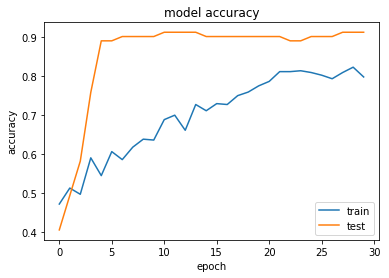

In [35]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

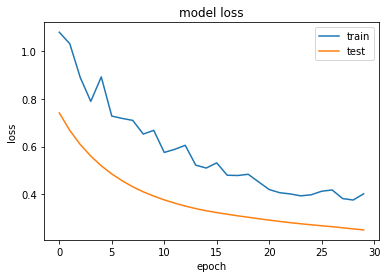

In [36]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [37]:
#Confusion Matrix generation
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_test_pred)
print(cm)

[[68  4]
 [ 1 41]]


In [38]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96        72
           1       0.91      0.98      0.94        42

   micro avg       0.96      0.96      0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



In [39]:
print('Train Accuracy: {}\nTest Accuracy:{}'.format(history.history['acc'][-1], history.history['val_acc'][-1]))

Train Accuracy: 0.7977272803133184
Test Accuracy:0.9120879173278809


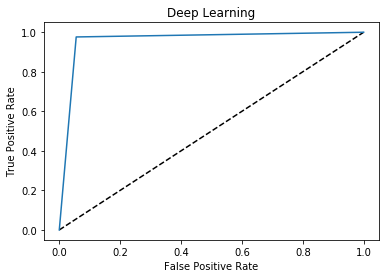

In [40]:
#Roc Curve generation
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_test, y_test_pred)
plt.plot ([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label = 'Deep Learning')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Deep Learning')
plt.show()

In [41]:
results_accuracy= pd.concat([results_control_accuracy, results_experimental_accuracy], axis=1)
results_accuracy.columns = ['Control', 'Experimental']

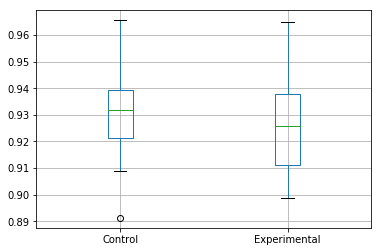

In [42]:
results_accuracy.boxplot()

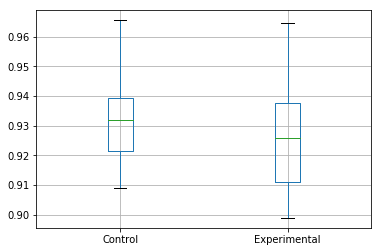

In [43]:
results_accuracy.boxplot(showfliers=False)

(0.9, 1)

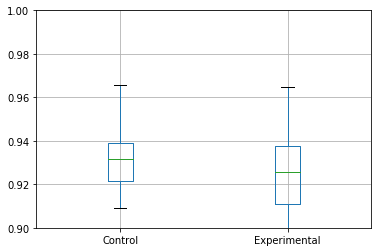

In [44]:
ax = results_accuracy.boxplot()
ax.set_ylim([0.9,1])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a5d5bf908>,
      dtype=object)

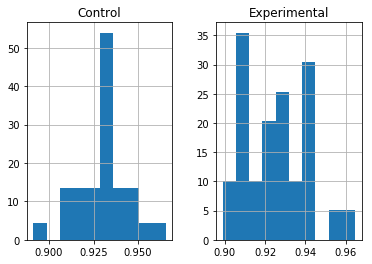

In [45]:
results_accuracy.hist(density=True)

In [46]:
#Normality Testing
from scipy import stats

alpha = 0.05;

s, p = stats.normaltest(results_control_accuracy)
if p < alpha:
  print('Control data is not normal')
else:
  print('Control data is normal')

s, p = stats.normaltest(results_experimental_accuracy)
if p < alpha:
  print('Experimental data is not normal')
else:
  print('Experimental data is normal')

Control data is normal
Experimental data is normal


In [47]:
#Significance Testing
s, p = stats.wilcoxon(results_control_accuracy[0], results_experimental_accuracy[0])

if p < 0.05:
  print('null hypothesis rejected, significant difference between the data-sets')
else:
  print('null hypothesis accepted, no significant difference between the data-sets')

null hypothesis accepted, no significant difference between the data-sets
